# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

In [3]:
# create the dataframe for city data
city_weather_df = pd.DataFrame({"City":cities})
city_weather_df['Cloudiness'] = ''
city_weather_df['Country'] = ''
city_weather_df['Date'] = ''
city_weather_df['Humidity'] = ''
city_weather_df['Lat'] = ''
city_weather_df['Lng'] = ''
city_weather_df['Max Temp'] = ''
city_weather_df['Wind Speed'] = ''

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
count = 1

citylist = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

for city in cities:    
    print(f"{count}: {city}")
    count = count + 1
        
    url = ("http://api.openweathermap.org/data/2.5/weather?"'appid={0}&q={1}&units=imperial&dt=utc').format(weather_api_key,city)
    
    try:
        # extract results
        response = requests.get(url).json()

        # add city info
        citylist.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        
    except:
        print("Not found")

1: busselton
2: mar del plata
3: hobart
4: ponta do sol
5: albany
6: illoqqortoormiut
Not found
7: yellowknife
8: kapaa
9: cape town
10: barrow
11: rikitea
12: upernavik
13: east london
14: jamestown
15: georgetown
16: grand centre
Not found
17: asau
18: jawhar
19: nikolskoye
20: avarua
21: erzin
22: cavalcante
23: margate
24: ushuaia
25: upington
26: taolanaro
Not found
27: hithadhoo
28: barentsburg
Not found
29: jiwani
30: togur
31: qaanaaq
32: kaka
33: beloha
34: letlhakane
35: puerto ayora
36: port alfred
37: saint george
38: samalaeulu
Not found
39: madimba
40: saldanha
41: baie-comeau
42: dodoma
43: arraial do cabo
44: barreiras
45: hermanus
46: norman wells
47: rawson
48: vaini
49: saskylakh
50: cap malheureux
51: tasiilaq
52: cumberland
53: adrasmon
54: khatanga
55: coihaique
56: bozuyuk
57: haimen
58: pedro carbo
59: ushtobe
60: murakami
61: paita
62: palmer
63: punta arenas
64: thompson
65: lebu
66: longyearbyen
67: vardo
68: sao jose da coroa grande
69: mataura
70: tumannyy


Not found
560: verkhnyaya inta
561: leiyang
562: samusu
Not found
563: maralal
564: zheleznodorozhnyy
565: chaa-khol
Not found
566: hobyo
567: babayurt
568: yablonovo
569: tomatlan
570: camacha
571: fukue
572: kusk
Not found
573: radcliff
574: brattvag
575: sovetskiy
576: haibowan
Not found
577: allapalli
578: shelburne
579: egvekinot
580: chamalieres
581: abu kamal
582: bulgan
583: pontes e lacerda
584: broome
585: wajima
586: hwange
587: el tambo
588: tungor
589: conde
590: yerbogachen
591: bridlington
592: bandrele
593: palu
594: isla vista
595: gangotri
Not found
596: fredericksburg
597: solnechnyy
598: ambilobe
599: oskemen
600: san policarpo
601: seydi
602: marshall
603: mangai
604: sergeyevka
605: hinton
606: wajir
607: khorixas


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
cityweather_df = pd.DataFrame({
                            "City":citylist,
                            "Cloudiness":cloudiness,
                            "Country":country,
                            "Date":date,
                            "Humidity":humidity,
                            "Lat":lat,
                            "Lng":lng,
                            "Max Temp F":max_temp,
                            "Wind Speed mph":wind_speed
    
})

# write the dataframe to a csv
cityweather_df.to_csv("cities.csv")
cityweather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp F,Wind Speed mph
0,Busselton,76,AU,1609622772,69,-33.65,115.33,57.99,1.01
1,Mar del Plata,0,AR,1609622481,51,-38.00,-57.56,84.20,14.99
2,Hobart,75,AU,1609622703,82,-42.88,147.33,62.01,3.36
3,Ponta do Sol,75,PT,1609622773,54,32.67,-17.10,59.00,9.17
4,Albany,52,US,1609622600,73,42.60,-73.97,37.99,15.99


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
SatHumidity = cityweather_df[cityweather_df['Humidity'] > 100] 
SatHumidity
# No cities have humidity that exceeds 100%.  Seems odd anyway since 100% is the point of complete saturation. But, whatever.
# I am following directions and will not find cities that are at 100% humidity.

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp F,Wind Speed mph


In [7]:
#  Get the indices of cities that have humidity over 100%.

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

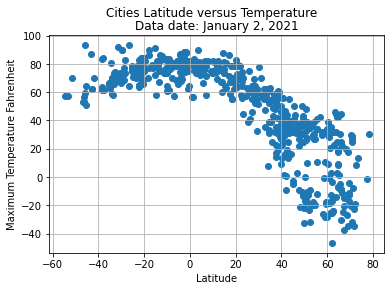

In [9]:
x_values = cityweather_df['Lat']
y_values = cityweather_df['Max Temp F']
plt.scatter(x_values,y_values)
plt.grid(True)
plt.suptitle('Cities Latitude versus Temperature')
plt.title('Data date: January 2, 2021')
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature Fahrenheit')
plt.savefig("Cities Latitude versus Temperature.png")
plt.show()

In [ ]:
# The scatter plot above shows that temperatures are consistently between 80 and 90 degrees fahrenheit up to 
# a latitude of -20/+20.  There are many more datapoints for a much colder northern hemisphere, where it 
# also happens to be winter at the time of the data retrieval.

## Latitude vs. Humidity Plot

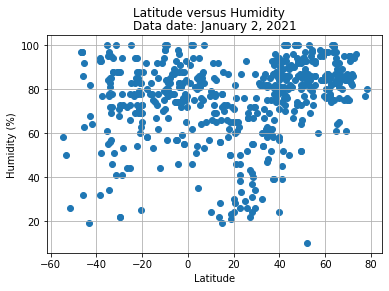

In [10]:
x_values = cityweather_df['Lat']
y_values = cityweather_df['Humidity']
plt.scatter(x_values,y_values)
plt.grid(True)
plt.suptitle('Latitude versus Humidity')
plt.title('Data date: January 2, 2021')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig("Cities Latitude versus Humidity.png")
plt.show()

In [ ]:
# The scatter plot above shows that humidity was mostly 60% or above on the date of the data retrieval. The distance from 
# the equator does not appear to be a factor.

## Latitude vs. Cloudiness Plot

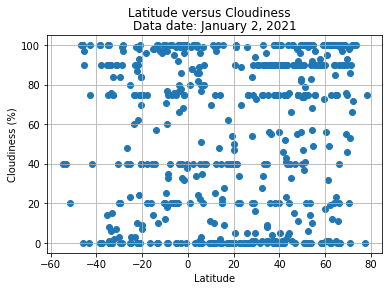

In [11]:
x_values = cityweather_df['Lat']
y_values = cityweather_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.grid(True)
plt.suptitle('Latitude versus Cloudiness')
plt.title('Data date: January 2, 2021')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig("Cities Latitude versus Cloudiness.png")
plt.show()

In [ ]:
# The scatter plot above shows that the percentage of cloudiness is fairly even, with either 100$ or 0% occurring the  
# most on the date of the data retrieval.  The distance from the equator does not appear to be a factor.

## Latitude vs. Wind Speed Plot

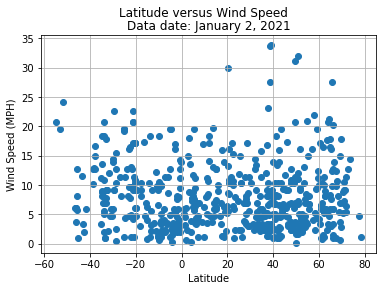

In [12]:
x_values = cityweather_df['Lat']
y_values = cityweather_df['Wind Speed mph']
plt.scatter(x_values,y_values)
plt.grid(True)
plt.suptitle('Latitude versus Wind Speed')
plt.title('Data date: January 2, 2021')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.savefig("Cities Latitude versus Wind Speed.png")
plt.show()

In [ ]:
# The scatter plot above shows that windspeeds of 15 mph or less are most common on the date of the data retrieval.
# The distance from the equator does not appear to be a factor.

## Linear Regression

In [13]:
Z=0
NorHem = cityweather_df.query(f"Lat >= {Z}")
SoutHem = cityweather_df.query(f"Lat <= {Z}")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.671446030556158


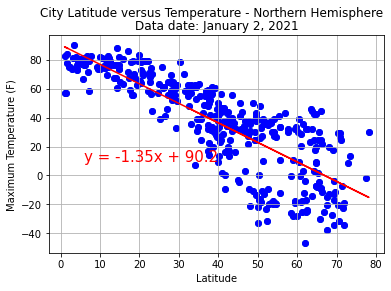

In [14]:
x_values = NorHem['Lat' ]
y_values = NorHem['Max Temp F']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.grid(True)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.scatter(x_values,y_values,color='blue')
plt.suptitle('City Latitude versus Temperature - Northern Hemisphere')
plt.title('Data date: January 2, 2021')
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (F)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Cities Latitude versus Temperature - Northern Hemisphere.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.22799972319889


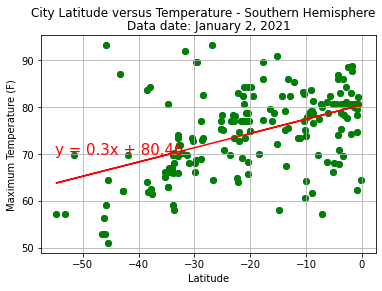

In [15]:
x_values = SoutHem['Lat' ]
y_values = SoutHem['Max Temp F']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.grid(True)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,70),fontsize=15,color="red")
plt.scatter(x_values,y_values,color='green')
plt.suptitle('City Latitude versus Temperature - Southern Hemisphere')
plt.title('Data date: January 2, 2021')
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (F)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Cities Latitude versus Temperature - Southern Hemisphere.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.13599886066372133


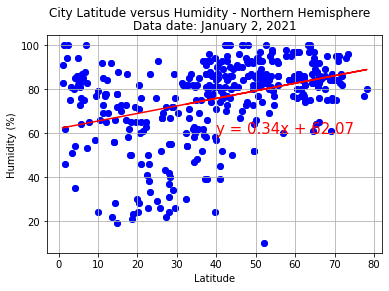

In [16]:
x_values = NorHem['Lat' ]
y_values = NorHem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.grid(True)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,60),fontsize=15,color="red")
plt.scatter(x_values,y_values,color='blue')
plt.suptitle('City Latitude versus Humidity - Northern Hemisphere')
plt.title('Data date: January 2, 2021')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Cities Latitude versus Humidity - Northern Hemisphere.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.030811479680717516


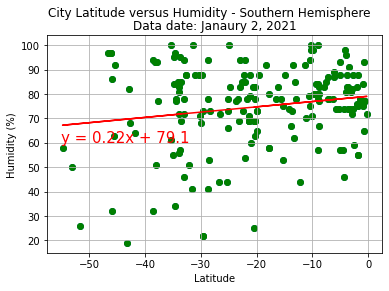

In [17]:
x_values = SoutHem['Lat' ]
y_values = SoutHem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.grid(True)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,60),fontsize=15,color="red")
plt.scatter(x_values,y_values,color='green')
plt.suptitle('City Latitude versus Humidity - Southern Hemisphere')
plt.title('Data date: Janaury 2, 2021')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Cities Latitude versus Humidity - Southern Hemisphere.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05147572427981017


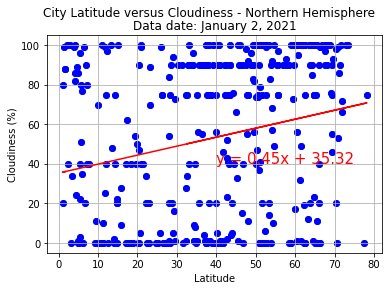

In [18]:
x_values = NorHem['Lat' ]
y_values = NorHem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.grid(True)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,40),fontsize=15,color="red")
plt.scatter(x_values,y_values,color='blue')
plt.suptitle('City Latitude versus Cloudiness - Northern Hemisphere')
plt.title('Data date: January 2, 2021')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Cities Latitude versus Cloudiness - Northern Hemisphere.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.015218577867501446


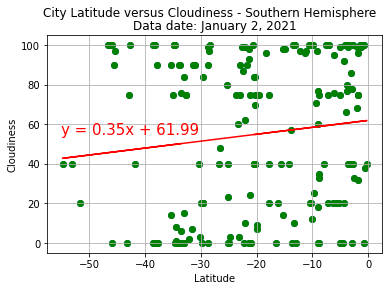

In [19]:
x_values = SoutHem['Lat' ]
y_values = SoutHem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.grid(True)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,55),fontsize=15,color="red")
plt.scatter(x_values,y_values,color='green')
plt.suptitle('City Latitude versus Cloudiness - Southern Hemisphere')
plt.title('Data date: January 2, 2021')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Cities Latitude versus Cloudiness - Southern Hemisphere.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0012028582152931126


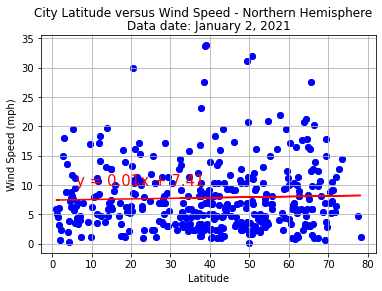

In [20]:
x_values = NorHem['Lat' ]
y_values = NorHem['Wind Speed mph']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.grid(True)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.scatter(x_values,y_values,color='blue')
plt.suptitle('City Latitude versus Wind Speed - Northern Hemisphere')
plt.title('Data date: January 2, 2021')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Cities Latitude versus Wind Speed - Northern Hemisphere.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.07027315302030653


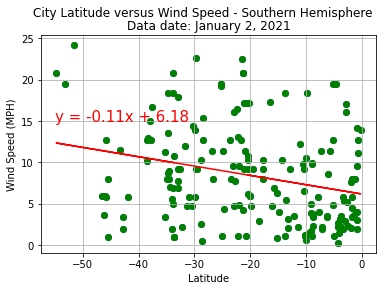

In [21]:
x_values = SoutHem['Lat' ]
y_values = SoutHem['Wind Speed mph']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.grid(True)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,15),fontsize=15,color="red")
plt.scatter(x_values,y_values,color='green')
plt.suptitle('City Latitude versus Wind Speed - Southern Hemisphere')
plt.title('Data date: January 2, 2021')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Cities Latitude versus Wind Speed - Southern Hemisphere.png")
plt.show()